# Car Price Prediction ( Linear Regression)
Building a  linear regression model for the prediction of car prices with the help of Car Data with their specification offered by American companies in the USA market.

Steps invlved in the predictive analysis:

Business Problem Understanding
Data Exploration
Data Cleaning and Standardization
Model Building
Model Evaluation
Feature selection using RFE
checking R2 score on training and test data

# Data Exploration and Understanding the Problem

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV,RFE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# reading the data with all the columns visible
car = pd.read_excel(r'C:\Final files\Dataworksheet.xlsx')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# information about columns
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# shape of dataframe
car.shape

(205, 26)

In [5]:
# count of null values in every column
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# describing every column
car.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


# Data Cleaning

In [7]:
# dropping duplicate rows if any
car.drop_duplicates().head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Now we need to drop the columns which are not suitable for predictions and training data
car_ID is an identity number given to every car and it does not have any affect on price.


Columns like enginetype, fuelsystem, enginelocation, aspiration, and fueltype are highly imbalanced classes or attributes. So we need to drop them as well.

In [8]:
# dropping all the required columns
car.drop(columns=['car_ID','enginetype','fuelsystem','enginelocation','aspiration','fueltype'],axis=1,inplace=True)

In [9]:
car.shape #after dropping above categories

(205, 20)

In [10]:
#will check with car_name as its seems to be important function

In [11]:
# carnames with their count in the data
car['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

# we will create a new column as Brand by keeping the 1st name only

In [12]:
# Extracting Car Brand name from 'CarName' column and putting it into a new column called 'Brand'
def split(x):
    return x.split(' ')[0]

car['Brand'] = car['CarName'].apply(split)
car.head(5)

,symboling,CarName,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,3,alfa-romero giulia,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,...,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,...,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,...,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [13]:
# count of car brands in the data
car['Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

# Repeated Brand names in data mentioned below:
toyota : toyouta

Nissan : nissan

porsche : porcsche

mazda : maxda

volkswagen : vw, vokswagen

In [14]:
# Converting all the Brand names to lowercase alphabets
car['Brand'] = car['Brand'].apply(lambda y: y.lower())

# corecting the wrongly marked data in the dataset
car.loc[(car['Brand'] == 'vw') | (car['Brand'] == 'vokswagen'),'Brand'] = 'volkswagen'
car.loc[(car['Brand'] == 'toyouta'),'Brand'] = 'toyota'
car.loc[(car['Brand'] == 'maxda'),'Brand'] = 'mazda'
car.loc[(car['Brand'] == 'porcshce'),'Brand'] = 'porsche'

In [15]:
car['Brand'].unique()  #its fixed now

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
#dropping CarName as we have created a Brand column for the same

In [17]:
car.drop(columns=['CarName'],axis=1,inplace=True)

In [18]:
car.columns

Index(['symboling', 'doornumber', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Brand'],
      dtype='object')

In [19]:
car.shape

(205, 20)

In [20]:
car['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [21]:
car['doornumber'] = car['doornumber'].map({'two':2,'four':4})

In [22]:
car['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [23]:
car['cylindernumber'] = car['cylindernumber'].map({'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3})

In [24]:
#we will use get dummies function for other catogorical variables to make the process fast

# Data Visualization

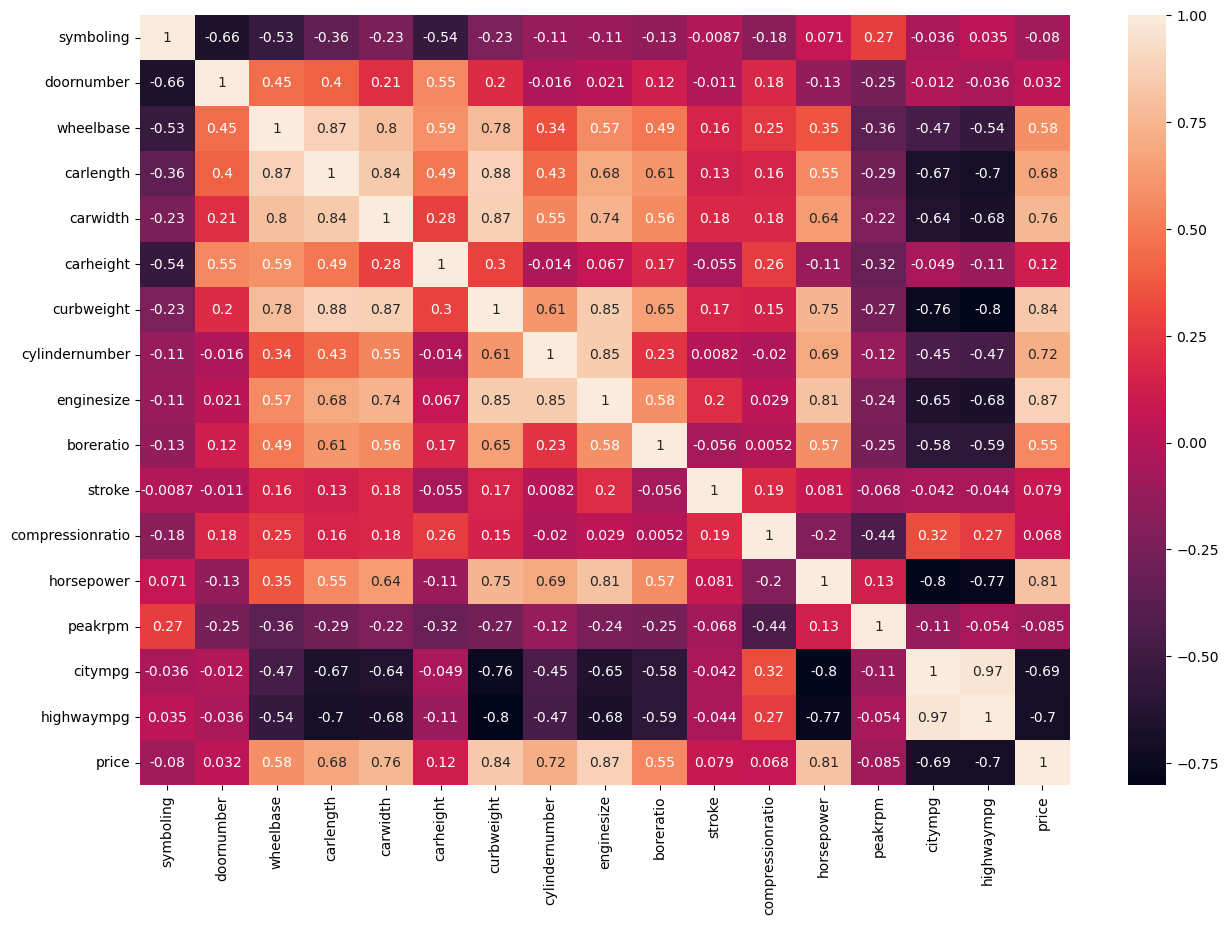

In [25]:
# heatmap to show the correlation beyween all numeric columns
plt.figure(figsize=(15,10))
sns.heatmap(car.corr(),annot=True)
plt.show()

# Dropping columns again according to their correlation

Columns stroke, compressionratio, and peakrpm needs to be dropped because they don't have much impact or a good correlation with any other variables.

In [26]:
# dropping columns with low correlation with target column
car.drop(columns=['stroke','compressionratio','peakrpm'],axis=1,inplace=True)

In [27]:
car.columns

Index(['symboling', 'doornumber', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'price', 'Brand'],
      dtype='object')

In [28]:
car.shape

(205, 17)

### Removing outliers from the data because it can affect the model during prediction and also affects the LinearRegression line while making the model

In [29]:
# a separate dataframe for numeric columns
numeric = car.select_dtypes(include=['int64','float64'])
numeric.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,154,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,102,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,115,18,22,17450.0


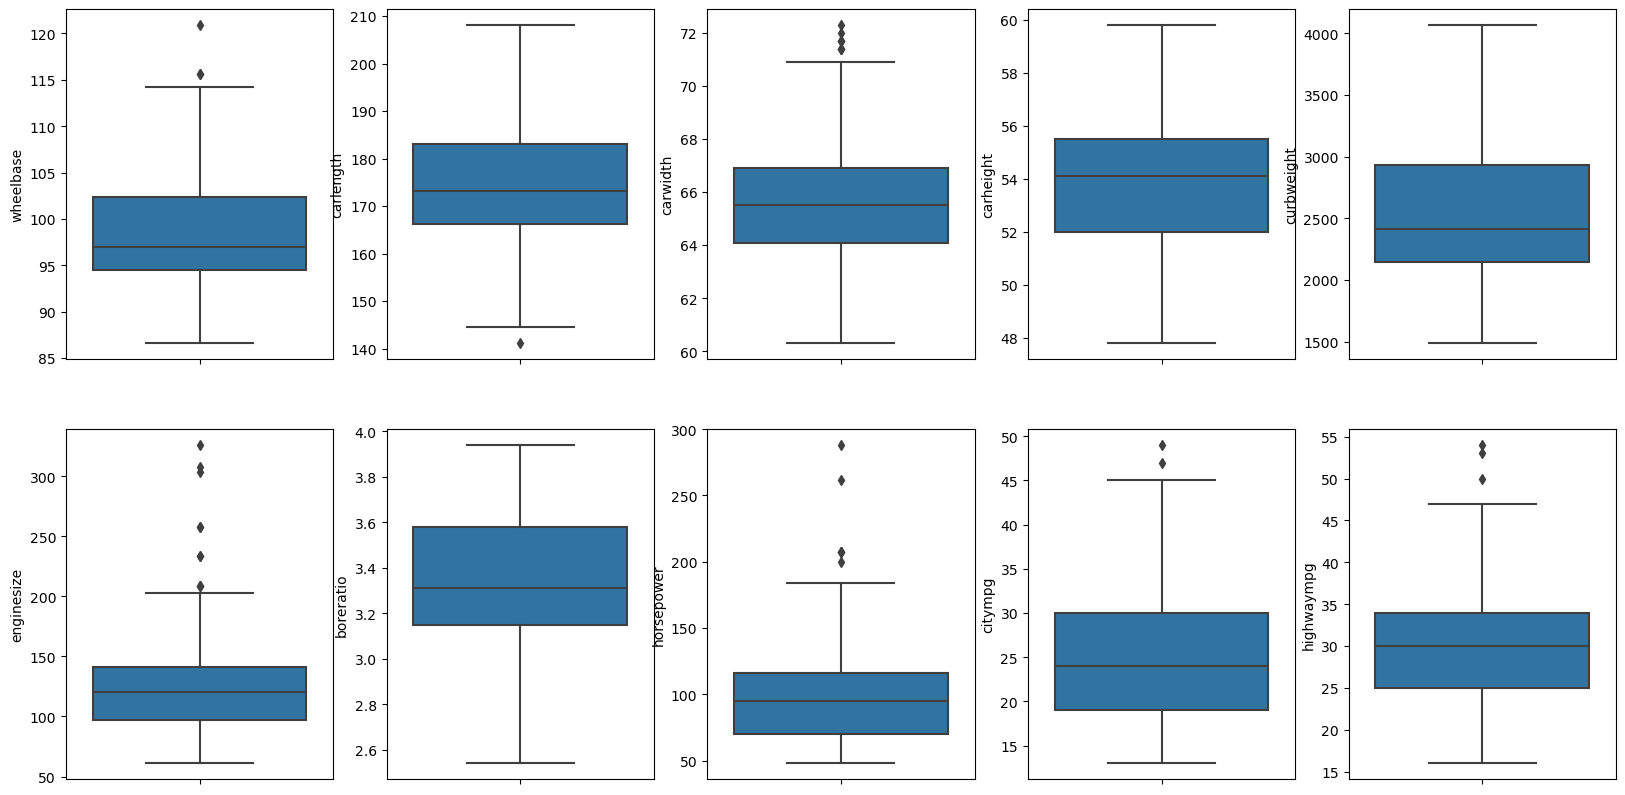

In [30]:
# plotting boxplot to identify outliers
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
sns.boxplot(y='wheelbase',data=car)
plt.subplot(2,5,2)
sns.boxplot(y='carlength',data=car)
plt.subplot(2,5,3)
sns.boxplot(y='carwidth',data=car)
plt.subplot(2,5,4)
sns.boxplot(y='carheight',data=car)
plt.subplot(2,5,5)
sns.boxplot(y='curbweight',data=car)
plt.subplot(2,5,6)
sns.boxplot(y='enginesize',data=car)
plt.subplot(2,5,7)
sns.boxplot(y='boreratio',data=car)
plt.subplot(2,5,8)
sns.boxplot(y='horsepower',data=car)
plt.subplot(2,5,9)
sns.boxplot(y='citympg',data=car)
plt.subplot(2,5,10)
sns.boxplot(y='highwaympg',data=car)
plt.show()

#### From the above graphs, we can see that the column enginesize have a good amount of outliers which needs to be cleaned or removed for the further predictive analysis

In [31]:
# 25th and 75th percentile of the values in enginesize column
Q1_es = car.enginesize.quantile(0.25)
Q3_es = car.enginesize.quantile(0.75)

# onter quartile range of the values
IQR_es = Q3_es - Q1_es

# upper limit : The values greater than this are outliers
upper_es = Q3_es + 1.5*IQR_es

# removing rows with outliers from dataframe
car = car[(car.enginesize < upper_es)]

In [32]:
# 10 rows got deleted after the outliers removal
car.shape

(195, 17)

### As enginesize, horsepower, and curbweight are highly correlated with price, we can categorize them into three parts.


curbweight : light, moderate and, heavy

enginesize : small, medium, and large

horsepower : low, medium, and high

In [33]:
# quantiles for all the columns
Q1_hp = car.horsepower.quantile(0.25)
Q3_hp = car.horsepower.quantile(0.75)
Q1_cw = car.curbweight.quantile(0.25)
Q3_cw = car.curbweight.quantile(0.75)

# function definitions
def curb_convert(x):
    if x <= Q1_cw:
        return 'light'
    elif x < Q3_cw and x > Q1_cw:
        return 'moderate'
    else:
        return 'heavy'
        
def es_convert(x):
    if x <= Q1_es:
        return 'small'
    elif x < Q3_es and x > Q1_es:
        return 'medium'
    else:
        return 'large'
        
def hp_convert(x):
    if x <= Q1_hp:
        return 'low'
    elif x < Q3_hp and x > Q1_hp:
        return 'medium'
    else:
        return 'high'

# calling the functions
car['curbtype'] = car['curbweight'].apply(curb_convert)
car['engsize'] = car['enginesize'].apply(es_convert)
car['hptype'] = car['horsepower'].apply(hp_convert)

In [34]:
car.columns

Index(['symboling', 'doornumber', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'price', 'Brand', 'curbtype', 'engsize', 'hptype'],
      dtype='object')

In [35]:
car.shape

(195, 20)

In [36]:
# all categorical columns or the columns with object dtype
categorical = car.select_dtypes(include=['object'])
categorical.head()

,carbody,drivewheel,Brand,curbtype,engsize,hptype
0,convertible,rwd,alfa-romero,moderate,medium,medium
1,convertible,rwd,alfa-romero,moderate,medium,medium
2,hatchback,rwd,alfa-romero,moderate,large,high
3,sedan,fwd,audi,moderate,medium,medium
4,sedan,4wd,audi,moderate,medium,medium


### Creating categorical columns vs price box plots to understand data and for all other remainings like symboling

<AxesSubplot:xlabel='hptype', ylabel='price'>

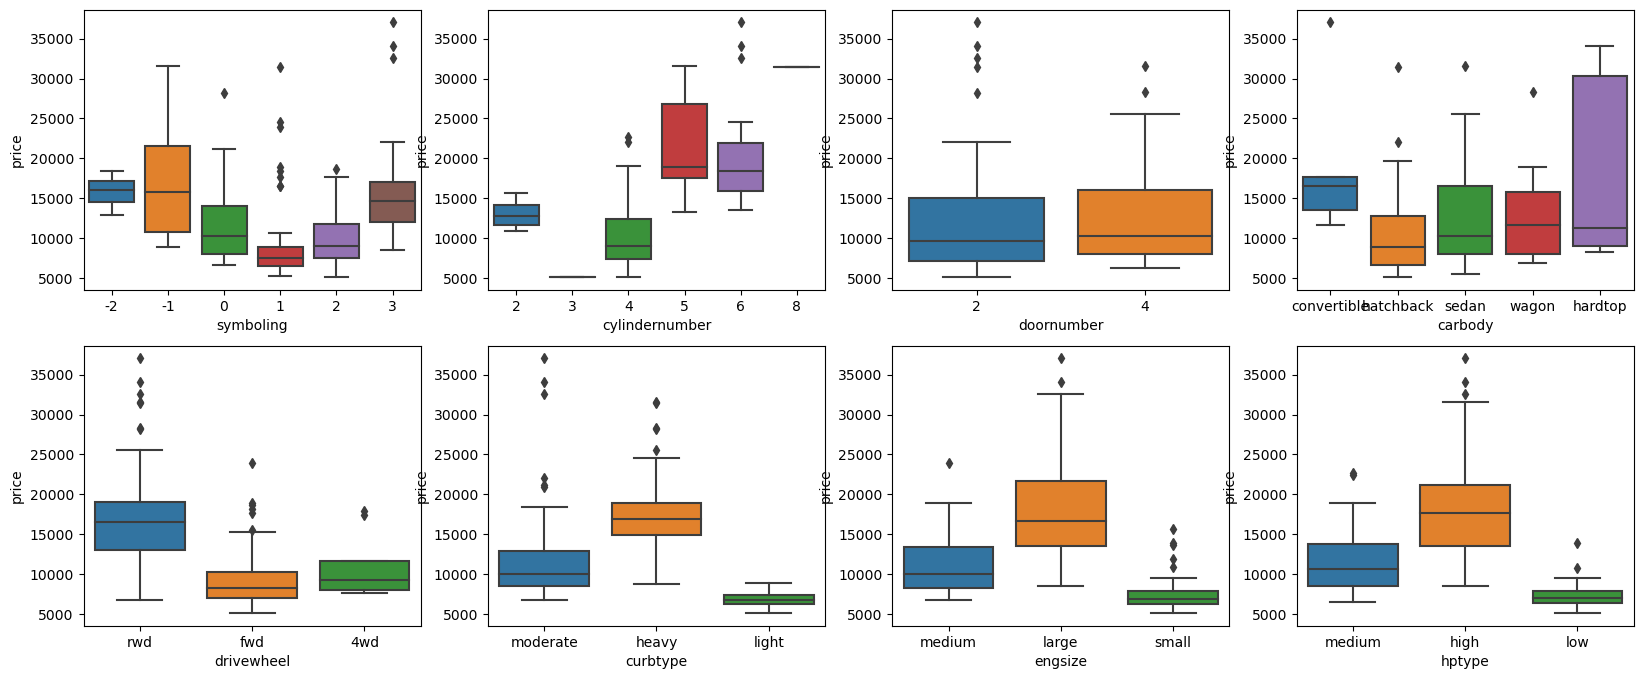

In [37]:
plt.figure(figsize=(20,8))
plt.subplot(2,4,1)
sns.boxplot(x='symboling',y='price',data=car)
plt.subplot(2,4,2)
sns.boxplot(x='cylindernumber',y='price',data=car)
plt.subplot(2,4,3)
sns.boxplot(x='doornumber',y='price',data=car)
plt.subplot(2,4,4)
sns.boxplot(x='carbody',y='price',data=car)
plt.subplot(2,4,5)
sns.boxplot(x='drivewheel',y='price',data=car)
plt.subplot(2,4,6)
sns.boxplot(x='curbtype',y='price',data=car)
plt.subplot(2,4,7)
sns.boxplot(x='engsize',y='price',data=car)
plt.subplot(2,4,8)
sns.boxplot(x='hptype',y='price',data=car)

<AxesSubplot:xlabel='Brand', ylabel='price'>

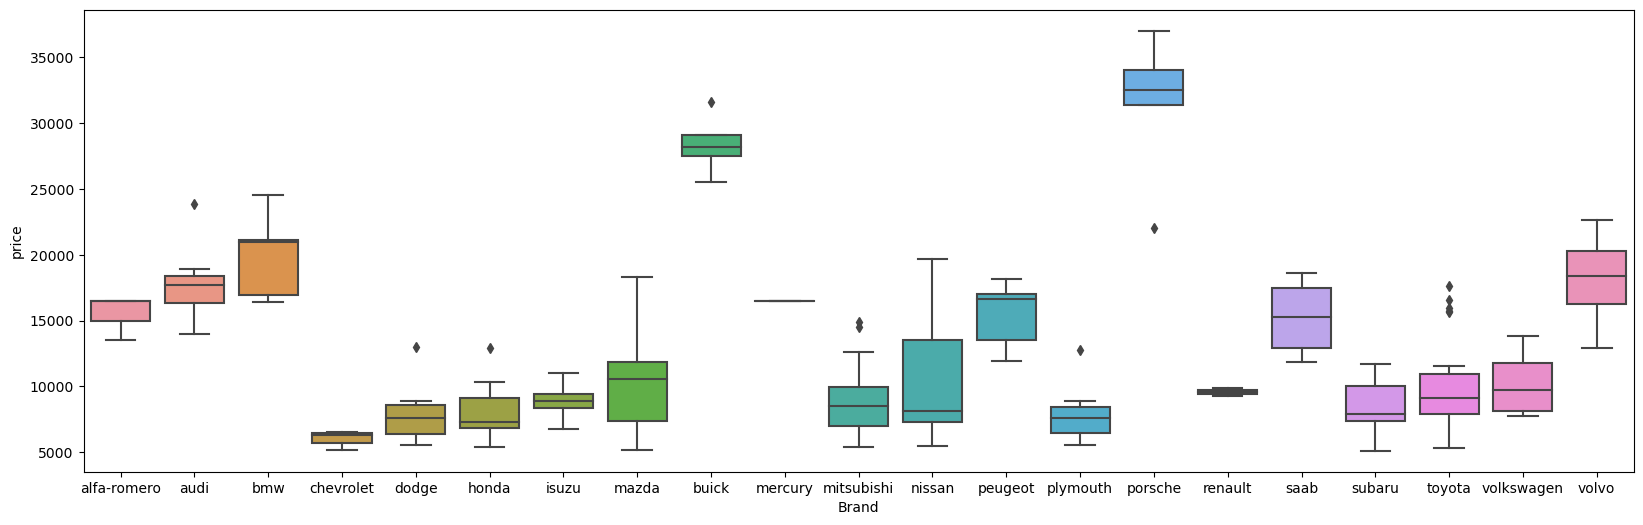

In [38]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Brand',y='price',data=car)

# Observation sfrom the above boplots:
The Brand boxplot clearly shows us that the car companies like bmw, buick, porsche and volvo has higher prices and the lowest belongs to chevrolet

cars having "rwd" drivewheel are costly withrespect to other categories.

Vehicles having more curbweight are supposed to be costly than the light ones.

Doornumber does not have much effect on the price of car.

Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have the highest median price.

Large enginesize vehicles are costly as compared to others.

The cars with extreme (-3 to 3) symboling rating have higher price that the average (0 or 1) ones.

In [39]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   symboling       195 non-null    int64  
 1   doornumber      195 non-null    int64  
 2   carbody         195 non-null    object 
 3   drivewheel      195 non-null    object 
 4   wheelbase       195 non-null    float64
 5   carlength       195 non-null    float64
 6   carwidth        195 non-null    float64
 7   carheight       195 non-null    float64
 8   curbweight      195 non-null    int64  
 9   cylindernumber  195 non-null    int64  
 10  enginesize      195 non-null    int64  
 11  boreratio       195 non-null    float64
 12  horsepower      195 non-null    int64  
 13  citympg         195 non-null    int64  
 14  highwaympg      195 non-null    int64  
 15  price           195 non-null    float64
 16  Brand           195 non-null    object 
 17  curbtype        195 non-null    obj

# ---
### Creating dummies of all the categorical columns left in the dataset

In [40]:
# converting to dummies
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,Brand_audi,Brand_bmw,Brand_buick,Brand_chevrolet,...,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [41]:
# concat the dummies dataframe to the main dataframe
car = pd.concat([car,dummies],axis=1)

# dropping all the categorical columns as the dummies are already created
car.drop(columns=categorical.columns,axis=1,inplace=True)

In [42]:
car.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,1,1,0,0,1
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,1,1,0,0,1
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,1,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,1,1,0,0,1
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,1,1,0,0,1


In [43]:
car.shape

(195, 46)

# Model Building

# Train-Test Split


You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [44]:
# splitting the main data into train and test data
car_train, car_test = train_test_split(car, train_size=0.7, test_size=0.3, random_state=100)

In [45]:
x_train = car_train.drop('price',1)
y_train = car_train['price']

C:\Users\admin\AppData\Local\Temp\ipykernel_2256\708133287.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train = car_train.drop('price',1)


# Scaling



As all the final independent variables in our dataset are numeric, we'll scale all the variables

In [46]:
# scaler object
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)

In [47]:
x_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
3,0.938539,0.862316,0.300864,0.349295,0.291222,0.210773,-0.357333,-0.301113,-0.375031,-0.436398,...,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
195,-1.500467,0.862316,1.156879,1.462104,0.846708,1.481250,1.220104,-0.301113,0.743637,1.901159,...,-0.281718,-0.377964,-0.281718,4.292851,-0.57735,-1.014816,-0.956814,-0.6227,-0.611341,1.0
29,1.751542,-1.159667,-0.441016,0.039168,0.346770,-1.417026,0.715415,-0.301113,1.268012,1.188006,...,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,-0.956814,-0.6227,-0.611341,-1.0
130,-0.687465,0.862316,-0.402970,0.796243,0.457868,0.568095,0.190357,-0.301113,0.429011,0.633331,...,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
133,0.938539,0.862316,0.167706,1.261434,0.457868,0.925416,0.452886,-0.301113,0.044469,0.950288,...,-0.281718,-0.377964,-0.281718,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0


# Building the first Linear Regression model with all the features

In [48]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [49]:
lm.score(x_train,y_train)    #The model is currently 96.4% accurate which is a very good value during model building


0.9649285454615241

In [50]:
car.shape

(195, 46)

# Model Building Using RFE

Now, you have 46 features. It is not adviced to manually eliminate these features

In [51]:
rfecv = RFECV(estimator=lm,step=1,cv=3)
rfecv.fit(x_train,y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 38


In [52]:
#  RFE object
lm = LinearRegression()

# RFE with 38 columns
rfe = RFE(lm,n_features_to_select=38)

# fit with 38 columns
rfe.fit(x_train,y_train)

list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('symboling', True, 1),
 ('doornumber', True, 1),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('citympg', False, 7),
 ('highwaympg', False, 3),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', True, 1),
 ('drivewheel_rwd', True, 1),
 ('Brand_audi', True, 1),
 ('Brand_bmw', True, 1),
 ('Brand_buick', True, 1),
 ('Brand_chevrolet', False, 2),
 ('Brand_dodge', True, 1),
 ('Brand_honda', True, 1),
 ('Brand_isuzu', False, 4),
 ('Brand_mazda', True, 1),
 ('Brand_mercury', False, 8),
 ('Brand_mitsubishi', True, 1),
 ('Brand_nissan', True, 1),
 ('Brand_peugeot', True, 1),
 ('Brand_plymouth', True, 1),
 ('Brand_porsche', True, 1),
 ('Brand_renault', False, 6),
 ('Brand_saab', True, 1),
 ('Brand_subaru', True, 1),
 ('

# Building a Linear Model using statsmodels

In [53]:
# Subset the features selected by rfe1
col1 = x_train.columns[rfe.support_]

# subsetting training data for 38 columns
x_train_rfe = x_train[col1]

# add constant to model
x_train_rfe = sm.add_constant(x_train_rfe)
x_train_rfe.head()


##added intercept to a model because it gives your model a starting point. 
#This makes the results of your model more meaningful and increases the likelihood that an effective part of your model will be shown.

,const,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,Brand_saab,Brand_subaru,Brand_toyota,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
3,1.0,0.938539,0.862316,0.300864,0.349295,0.291222,0.210773,-0.357333,-0.301113,-0.375031,...,-0.122169,-0.281718,-0.377964,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
195,1.0,-1.500467,0.862316,1.156879,1.462104,0.846708,1.481250,1.220104,-0.301113,0.743637,...,-0.122169,-0.281718,-0.377964,4.292851,-0.57735,-1.014816,-0.956814,-0.6227,-0.611341,1.0
29,1.0,1.751542,-1.159667,-0.441016,0.039168,0.346770,-1.417026,0.715415,-0.301113,1.268012,...,-0.122169,-0.281718,-0.377964,-0.232945,-0.57735,0.985401,-0.956814,-0.6227,-0.611341,-1.0
130,1.0,-0.687465,0.862316,-0.402970,0.796243,0.457868,0.568095,0.190357,-0.301113,0.429011,...,-0.122169,-0.281718,-0.377964,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0
133,1.0,0.938539,0.862316,0.167706,1.261434,0.457868,0.925416,0.452886,-0.301113,0.044469,...,8.185353,-0.281718,-0.377964,-0.232945,-0.57735,0.985401,1.045135,-0.6227,-0.611341,1.0


In [54]:
# fitting the model with 38 variables
lm1 = sm.OLS(y_train,x_train_rfe).fit()

# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     69.99
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.35e-55
Time:                        00:27:06   Log-Likelihood:                -1144.1
No. Observations:                 136   AIC:                             2366.
Df Residuals:                      97   BIC:                             2480.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    110.64

In [55]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     69.99
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.35e-55
Time:                        00:27:06   Log-Likelihood:                -1144.1
No. Observations:                 136   AIC:                             2366.
Df Residuals:                      97   BIC:                             2480.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    110.64

In [56]:
x_train_rfe.drop('carbody_hardtop',axis=1,inplace=True)

In [57]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     70.16
Date:                Sun, 07 May 2023   Prob (F-statistic):           7.84e-56
Time:                        00:27:06   Log-Likelihood:                -1146.4
No. Observations:                 136   AIC:                             2369.
Df Residuals:                      98   BIC:                             2479.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    111.93

In [58]:
x_train_rfe.drop('carbody_wagon',axis=1,inplace=True)

In [59]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     69.48
Date:                Sun, 07 May 2023   Prob (F-statistic):           8.37e-56
Time:                        00:27:06   Log-Likelihood:                -1149.5
No. Observations:                 136   AIC:                             2373.
Df Residuals:                      99   BIC:                             2481.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    113.92

In [60]:
x_train_rfe.drop('carbody_hatchback',axis=1,inplace=True)

In [61]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     69.92
Date:                Sun, 07 May 2023   Prob (F-statistic):           4.44e-56
Time:                        00:27:06   Log-Likelihood:                -1151.6
No. Observations:                 136   AIC:                             2375.
Df Residuals:                     100   BIC:                             2480.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    115.10

In [62]:
x_train_rfe.drop('Brand_honda',axis=1,inplace=True)

In [63]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     72.51
Date:                Sun, 07 May 2023   Prob (F-statistic):           5.85e-57
Time:                        00:27:07   Log-Likelihood:                -1151.7
No. Observations:                 136   AIC:                             2373.
Df Residuals:                     101   BIC:                             2475.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    114.67

In [64]:
x_train_rfe.drop('boreratio',axis=1,inplace=True)

In [65]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     69.49
Date:                Sun, 07 May 2023   Prob (F-statistic):           3.53e-56
Time:                        00:27:07   Log-Likelihood:                -1157.1
No. Observations:                 136   AIC:                             2382.
Df Residuals:                     102   BIC:                             2481.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    118.70

In [66]:
x_train_rfe.drop('hptype_medium',axis=1,inplace=True)

In [67]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     71.45
Date:                Sun, 07 May 2023   Prob (F-statistic):           7.63e-57
Time:                        00:27:07   Log-Likelihood:                -1157.9
No. Observations:                 136   AIC:                             2382.
Df Residuals:                     103   BIC:                             2478.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    118.84

In [68]:
x_train_rfe.drop('Brand_nissan',axis=1,inplace=True)

In [69]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     74.19
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.05e-57
Time:                        00:27:07   Log-Likelihood:                -1158.2
No. Observations:                 136   AIC:                             2380.
Df Residuals:                     104   BIC:                             2474.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    118.49

In [70]:
x_train_rfe.drop('engsize_medium',axis=1,inplace=True)

In [71]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     76.17
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.62e-58
Time:                        00:27:07   Log-Likelihood:                -1159.2
No. Observations:                 136   AIC:                             2380.
Df Residuals:                     105   BIC:                             2471.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    118.83

In [72]:
x_train_rfe.drop('carheight',axis=1,inplace=True)

In [73]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     75.84
Date:                Sun, 07 May 2023   Prob (F-statistic):           3.16e-58
Time:                        00:27:07   Log-Likelihood:                -1162.3
No. Observations:                 136   AIC:                             2385.
Df Residuals:                     106   BIC:                             2472.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    120.99

In [74]:
x_train_rfe.drop('symboling',axis=1,inplace=True)

In [75]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     77.27
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.29e-58
Time:                        00:27:07   Log-Likelihood:                -1164.0
No. Observations:                 136   AIC:                             2386.
Df Residuals:                     107   BIC:                             2470.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    121.92

In [76]:
x_train_rfe.drop('Brand_dodge',axis=1,inplace=True)

In [77]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     76.17
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.98e-58
Time:                        00:27:07   Log-Likelihood:                -1167.9
No. Observations:                 136   AIC:                             2392.
Df Residuals:                     108   BIC:                             2473.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    124.86

In [78]:
x_train_rfe.drop('Brand_mitsubishi',axis=1,inplace=True)

In [79]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     76.86
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.30e-58
Time:                        00:27:07   Log-Likelihood:                -1170.3
No. Observations:                 136   AIC:                             2395.
Df Residuals:                     109   BIC:                             2473.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    126.55

In [80]:
x_train_rfe.drop('Brand_plymouth',axis=1,inplace=True)

In [81]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     77.97
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.45e-58
Time:                        00:27:07   Log-Likelihood:                -1172.5
No. Observations:                 136   AIC:                             2397.
Df Residuals:                     110   BIC:                             2473.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    128.02

In [82]:
x_train_rfe.drop('Brand_toyota',axis=1,inplace=True)

In [83]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     79.27
Date:                Sun, 07 May 2023   Prob (F-statistic):           8.90e-59
Time:                        00:27:08   Log-Likelihood:                -1174.6
No. Observations:                 136   AIC:                             2399.
Df Residuals:                     111   BIC:                             2472.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.19e+04    129.46

## checking the shape

In [84]:
x_train_rfe.shape

(136, 25)

In [85]:
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 3 to 8
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              136 non-null    float64
 1   doornumber         136 non-null    float64
 2   wheelbase          136 non-null    float64
 3   carlength          136 non-null    float64
 4   carwidth           136 non-null    float64
 5   curbweight         136 non-null    float64
 6   cylindernumber     136 non-null    float64
 7   enginesize         136 non-null    float64
 8   horsepower         136 non-null    float64
 9   carbody_sedan      136 non-null    float64
 10  drivewheel_fwd     136 non-null    float64
 11  drivewheel_rwd     136 non-null    float64
 12  Brand_audi         136 non-null    float64
 13  Brand_bmw          136 non-null    float64
 14  Brand_buick        136 non-null    float64
 15  Brand_mazda        136 non-null    float64
 16  Brand_peugeot      136 non-n

### We came down from 38 variables to 25 variables. This model is explaining most of the variance without being too complex. So let's proceed with this model

# Model Evaluation

In [86]:
col1 = x_train_rfe.columns
col1

Index(['const', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'cylindernumber', 'enginesize', 'horsepower',
       'carbody_sedan', 'drivewheel_fwd', 'drivewheel_rwd', 'Brand_audi',
       'Brand_bmw', 'Brand_buick', 'Brand_mazda', 'Brand_peugeot',
       'Brand_porsche', 'Brand_saab', 'Brand_subaru', 'Brand_volvo',
       'curbtype_light', 'curbtype_moderate', 'engsize_small', 'hptype_low'],
      dtype='object')

In [87]:
x_test = car_test.drop('price',1)
y_test = car_test['price']

C:\Users\admin\AppData\Local\Temp\ipykernel_2256\920329918.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test = car_test.drop('price',1)


In [88]:
# subsetting
x_test[x_test.columns] = scaler.transform(x_test)

In [89]:
# adding constant to test dataset
x_test = sm.add_constant(x_test,has_constant='add')

In [90]:
x_test.head()

,const,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo,curbtype_light,curbtype_moderate,engsize_medium,engsize_small,hptype_low,hptype_medium
174,1.0,-1.500467,0.862316,0.795451,0.258082,0.457868,0.448988,-0.033698,-0.301113,-0.340073,...,-0.281718,2.645751,-0.281718,-0.232945,-0.577350,0.985401,1.045135,-0.6227,-0.611341,1.0
198,1.0,-2.313470,0.862316,1.156879,1.462104,0.846708,0.965119,1.244999,-0.301113,0.359095,...,-0.281718,-0.377964,-0.281718,4.292851,-0.577350,-1.014816,1.045135,-0.6227,-0.611341,-1.0
156,1.0,-0.687465,0.862316,-0.479061,-0.590207,-0.708653,-0.305358,-0.936708,-0.301113,-0.759574,...,-0.281718,2.645751,-0.281718,-0.232945,1.732051,-1.014816,1.045135,-0.6227,1.635749,-1.0
136,1.0,1.751542,-1.159667,0.167706,1.261434,0.457868,0.925416,0.708625,-0.301113,0.044469,...,-0.281718,-0.377964,-0.281718,-0.232945,-0.577350,0.985401,1.045135,-0.6227,-0.611341,-1.0
161,1.0,-0.687465,0.862316,-0.479061,-0.590207,-0.708653,-0.384763,-0.843917,-0.301113,-0.759574,...,-0.281718,2.645751,-0.281718,-0.232945,1.732051,-1.014816,1.045135,-0.6227,1.635749,-1.0


In [91]:
x_test_rfe = x_test[col1]

In [92]:
x_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 174 to 132
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   const              59 non-null     float64
 1   doornumber         59 non-null     float64
 2   wheelbase          59 non-null     float64
 3   carlength          59 non-null     float64
 4   carwidth           59 non-null     float64
 5   curbweight         59 non-null     float64
 6   cylindernumber     59 non-null     float64
 7   enginesize         59 non-null     float64
 8   horsepower         59 non-null     float64
 9   carbody_sedan      59 non-null     float64
 10  drivewheel_fwd     59 non-null     float64
 11  drivewheel_rwd     59 non-null     float64
 12  Brand_audi         59 non-null     float64
 13  Brand_bmw          59 non-null     float64
 14  Brand_buick        59 non-null     float64
 15  Brand_mazda        59 non-null     float64
 16  Brand_peugeot      59 non

In [93]:
# predicting y values corresponding to x_test_rfe
y_pred = lm1.predict(x_test_rfe)

In [94]:
y_pred.head()

174    11343.715001
198    19147.642073
156     7876.736288
136    16440.417772
161     7446.048580
dtype: float64

In [95]:
y_test.head()

174    10698.0
198    18420.0
156     6938.0
136    18150.0
161     8358.0
Name: price, dtype: float64

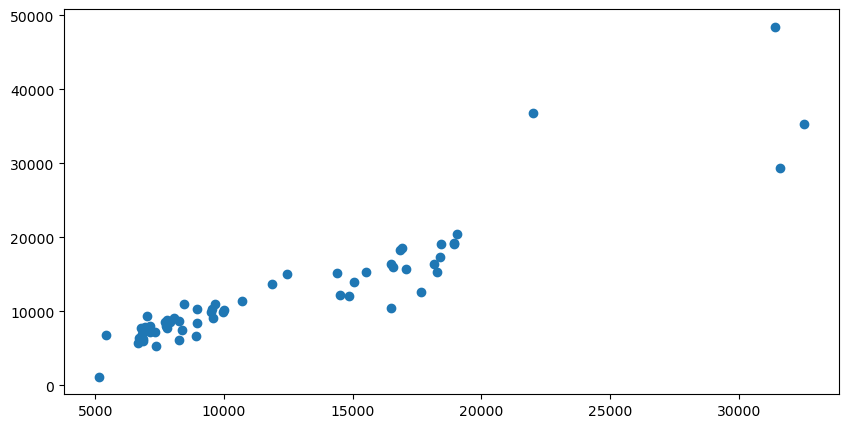

In [96]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)

## From the above plot, it's evident that the model is doing quite good on the test set as well. 

In [97]:
# Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test,y_pred))

3415.7913823592294

In [98]:
# chacking r-squared of the test set
r_square = r2_score(y_test,y_pred)
r_square

0.7134127044788057

# Random Forest Regressor

In [99]:
from sklearn.ensemble import RandomForestRegressor

# create the SVR model
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model on the training data
rfr.fit(x_train_rfe, y_train)

# predict on the testing data
y_pred_rf = rfr.predict(x_test_rfe)
y_train_pred = rfr.predict(x_train_rfe)

In [100]:
r_square = r2_score(y_train,y_train_pred)
r_square   #Train R2

0.9794811809047449

In [101]:
r_square = r2_score(y_test,y_pred_rf)
r_square    #Test R2

0.9035407744409585

In [102]:
import statsmodels.api as sm


# Fit a linear regression model on the training set
model = sm.OLS(y_train, sm.add_constant(x_train))
results = model.fit()

# Access the coefficients of the linear regression model
coefficients = results.params[1:] # exclude the intercept term

# Print the coefficients
print('Coefficients:', coefficients)


Coefficients: symboling            3.962321e+02
doornumber           4.827151e+02
wheelbase            1.975263e+03
carlength           -1.753190e+03
carwidth             9.817559e+02
carheight           -6.239265e+02
curbweight           3.011004e+03
cylindernumber      -1.330915e+03
enginesize           1.963639e+03
boreratio           -1.766627e+03
horsepower           1.274185e+03
citympg              4.299760e+00
highwaympg          -3.308062e+01
carbody_hardtop     -3.083815e+02
carbody_hatchback   -1.540965e+03
carbody_sedan       -1.424432e+03
carbody_wagon       -1.069083e+03
drivewheel_fwd       8.594238e+01
drivewheel_rwd       6.309973e+02
Brand_audi           4.916335e+02
Brand_bmw            1.470483e+03
Brand_buick          8.254945e+02
Brand_chevrolet     -6.655179e+01
Brand_dodge         -3.478014e+02
Brand_honda          1.516068e+02
Brand_isuzu          1.295585e+01
Brand_mazda          2.784272e+02
Brand_mercury        3.146020e-12
Brand_mitsubishi    -4.872096e+02


In [103]:
# Get the absolute values of the coefficients
abs_coefficients = abs(coefficients)

# Sort the coefficients in descending order
sorted_coefficients = abs_coefficients.sort_values(ascending=False)

# Get the top 10 features
top_10_features = sorted_coefficients.index[:10]

# Print the top 10 features
print('Top 10 features:', top_10_features)


Top 10 features: Index(['curbweight', 'Brand_porsche', 'wheelbase', 'enginesize', 'boreratio',
       'carlength', 'carbody_hatchback', 'Brand_bmw', 'carbody_sedan',
       'cylindernumber'],
      dtype='object')


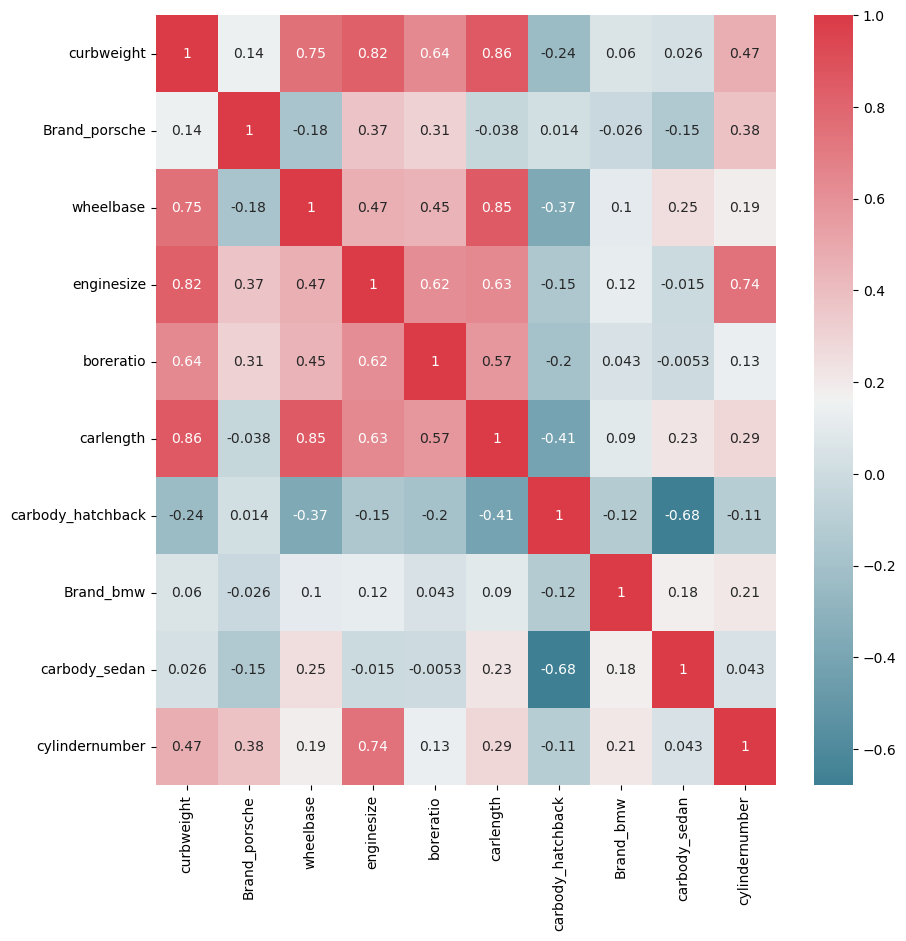

In [104]:
features = ['curbweight', 'Brand_porsche', 'wheelbase', 'enginesize', 'boreratio',
       'carlength', 'carbody_hatchback', 'Brand_bmw', 'carbody_sedan',
       'cylindernumber']

# Define a custom color palette
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create the heatmap with the customized color palette
plt.figure(figsize=(10,10))
sns.heatmap(car[features].corr(), annot=True, cmap=cmap)
plt.show()
